In [3]:
import sys
sys.path.insert(0, "..")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IA.utils import mapping, parameter_range
from scipy import stats
import math

In [53]:
!ls -lah analysis/not_uploaded/IA/ | grep regress

-rw-r--r-- 1 janpf janpf 931M Oct 23 15:51 .scratch.ckpts.IA.pexels.scores-None.change_regress.epoch-8.pth.txt
-rw-r--r-- 1 janpf janpf 936M Oct 23 15:52 .scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-5.pth.txt


In [54]:
df = pd.read_csv("../analysis/not_uploaded/IA/.scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-9.pth.txt")
#df = pd.read_csv("../analysis/not_uploaded/IA/.scratch.ckpts.IA.pexels.scores-None.change_regress.epoch-8.pth.txt")

for col in df.columns:
    if not"score" in col:
        continue

    df[col] = df[col].apply(lambda row: row[0])

print(df.columns)
df

Index(['img', 'distortion', 'level', 'score', 'styles_contrast_strength',
       'styles_brightness_strength', 'styles_saturation_strength',
       'styles_shadows_strength', 'styles_highlights_strength',
       'styles_exposure_strength', 'styles_vibrance_strength',
       'styles_temperature_strength', 'styles_tint_strength',
       'technical_jpeg_compression_strength',
       'technical_defocus_blur_strength', 'technical_motion_blur_strength',
       'technical_pixelate_strength', 'technical_gaussian_noise_strength',
       'technical_impulse_noise_strength', 'composition_rotate_strength',
       'composition_hcrop_strength', 'composition_vcrop_strength',
       'composition_leftcornerscrop_strength',
       'composition_rightcornerscrop_strength', 'composition_ratio_strength'],
      dtype='object')


,img,distortion,level,score,styles_contrast_strength,styles_brightness_strength,styles_saturation_strength,styles_shadows_strength,styles_highlights_strength,styles_exposure_strength,...,technical_motion_blur_strength,technical_pixelate_strength,technical_gaussian_noise_strength,technical_impulse_noise_strength,composition_rotate_strength,composition_hcrop_strength,composition_vcrop_strength,composition_leftcornerscrop_strength,composition_rightcornerscrop_strength,composition_ratio_strength
0,5/3/c/abbey-glass-religion-architecture-106158...,original,0.0,[0.65478515625],0.296631,-0.296387,0.149414,-0.616211,0.251221,-0.174561,...,0.248413,0.310547,0.188232,0.161621,-0.030701,-0.213013,-0.084229,-0.075073,-0.067871,-0.061218
1,9/4/4/abraham-lincoln-lincoln-memorial-washing...,original,0.0,[0.75146484375],0.242676,-0.157959,0.305908,-0.131958,0.073486,-0.076599,...,-0.168213,0.280029,-0.021729,-0.042969,0.134766,0.213745,0.015228,0.029755,0.027496,0.138916
2,a/5/9/abstract-background-backgrounds-botany-8...,original,0.0,[0.8271484375],0.114014,-0.019958,1.135742,0.114502,0.017090,0.358887,...,-0.015381,0.102295,-0.324463,-0.288574,0.150391,-0.228516,0.078430,0.046448,0.137085,0.261475
3,2/2/c/adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,[0.8623046875],0.383545,-0.445068,0.894531,-0.363770,0.375488,-0.267578,...,-0.222412,0.123535,0.177979,0.103516,-0.134155,-0.073242,0.035126,0.090210,0.029572,0.156738
4,a/0/7/adult-cute-face-female-41522.jpeg,original,0.0,[0.83154296875],0.057800,0.130981,0.278809,0.089600,0.349121,-0.148438,...,-0.059570,0.313477,-0.027832,0.020508,-0.002956,-0.210693,0.372559,0.348633,0.381348,-0.393555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609995,0/d/b/wood-painting-window-cactus-6689.jpg,ratio,5.0,[0.85546875],0.129395,-0.218994,0.034729,-0.068481,-0.286621,-0.520020,...,0.018799,0.270508,0.044678,0.037842,-0.000702,-0.094421,-0.104004,-0.087646,-0.106079,0.130493
2609996,0/1/0/wood-sky-forest-autumn.jpg,ratio,5.0,[0.63525390625],0.430420,-0.223755,0.359375,-0.333496,0.177612,0.192993,...,0.116943,0.321777,0.093018,0.071533,-0.022491,-0.040222,-0.185913,-0.225342,-0.168091,0.513672
2609997,0/d/2/wood-stool-wooden-wine.jpg,ratio,5.0,[0.80126953125],0.157593,0.246826,-0.031311,-0.109619,0.434814,0.185059,...,0.016113,0.065430,-0.041016,-0.030762,-0.195068,0.252686,-0.094482,-0.064819,-0.101196,0.168213
2609998,b/5/e/wood-tree-brown-bark.jpg,ratio,5.0,[0.5869140625],0.244019,-0.170898,0.113403,-0.309326,0.140503,0.048706,...,0.206299,0.255615,0.147095,0.138550,0.107239,-0.224487,0.119141,0.100098,0.116211,-0.174316


In [55]:
def violin_distortion(distortion:str, change:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == "original")]
    if distortion in parameter_range:
        plot_frame.loc[plot_frame["distortion"] == "original", "level"] = parameter_range[distortion]["default"]
    sns.violinplot(data=plot_frame, x="level", y=change, color="steelblue")
    plt.ylim(-1, 1)

In [56]:
parameter_range.keys()

dict_keys(['contrast', 'brightness', 'saturation', 'shadows', 'highlights', 'exposure', 'vibrance', 'temperature', 'tint', 'lcontrast'])

/home/janpf/projects/NIAA/venv/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


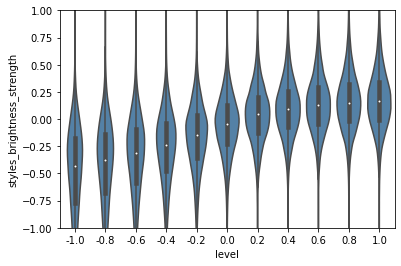

In [57]:
dist = "brightness"
violin_distortion(dist, f"styles_{dist}_strength")

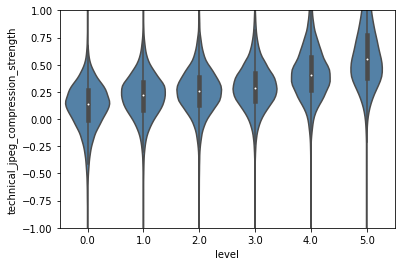

In [58]:
dist = "jpeg_compression"
violin_distortion(dist, f"technical_{dist}_strength")

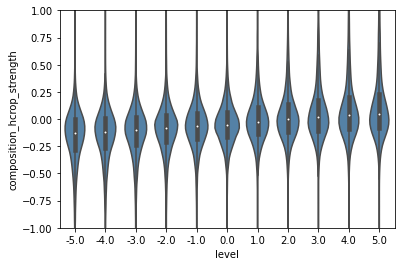

In [59]:
dist = "hcrop"
violin_distortion(dist, f"composition_{dist}_strength")

In [60]:
def violin_original():
    plot_frame = df[df["distortion"] == "original"]
    plot_frame = plot_frame[[col for col in df.columns if "strength" in col]]
    sns.violinplot(data=plot_frame, color="steelblue")
    plt.ylim(-1, 1)
    plt.gcf().set_size_inches(20,10)
    plt.xticks(rotation=90)
    plt.hlines(0, 0, len(plot_frame.columns)-1)

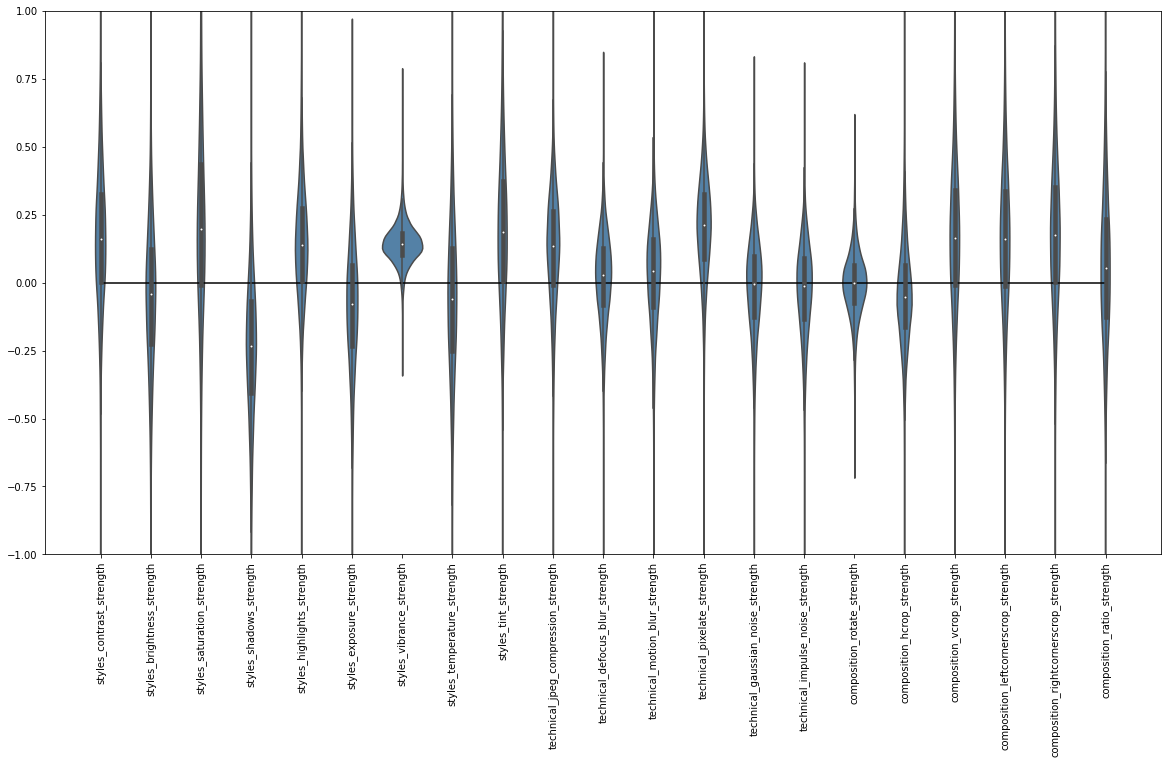

In [61]:
violin_original()